In [6]:
import pandas as pd

df = pd.read_csv("../Downloads/adult.csv")

In [7]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [8]:
df = pd.concat([df.drop('workclass', axis= 1), pd.get_dummies(df['workclass']).add_prefix('workclass_')], axis= 1)
df = pd.concat([df.drop('marital-status', axis= 1), pd.get_dummies(df['marital-status']).add_prefix('marital-status_')], axis= 1)
df = pd.concat([df.drop('education', axis= 1), pd.get_dummies(df['education']).add_prefix('education_')], axis= 1)
df = pd.concat([df.drop('occupation', axis= 1), pd.get_dummies(df['occupation']).add_prefix('occupation_')], axis= 1)
df = pd.concat([df.drop('relationship', axis= 1), pd.get_dummies(df['relationship']).add_prefix('relationship_')], axis= 1)
df = pd.concat([df.drop('race', axis= 1), pd.get_dummies(df['race']).add_prefix('race_')], axis= 1)
df = pd.concat([df.drop('native-country', axis= 1), pd.get_dummies(df['native-country']).add_prefix('native-country_')], axis= 1)

In [9]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == "Male" else 0)
df['income'] = df['income'].apply(lambda x: 1 if x == ">50K" else 0)

In [10]:
df.head()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_?,workclass_Federal-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,1,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,1,7688,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,0,30,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

X = df.drop('income', axis= 1)
y = df['income']

forest = RandomForestClassifier(n_jobs= -1, random_state= 42)

forest.fit(X,y)

f1_scores = []
features = []

num_feature_start = X.shape[1]


# Split into train and test
while X.shape[1] > 0:
    print(f'Training rf on the {X.shape[1]} most important features')
    feature_importances = forest.feature_importances_

    y_pred = forest.predict(X)
    f1 = f1_score(y, y_pred)
    f1_scores.append(f1)

    if X.shape[1] == 1:
        break
    least_important_index = feature_importances.argmin()

    X = X.drop(X.columns[least_important_index], axis= 1)
    
    forest.fit(X,y)

Training rf on the 107 most important features
Training rf on the 106 most important features
Training rf on the 105 most important features
Training rf on the 104 most important features
Training rf on the 103 most important features
Training rf on the 102 most important features
Training rf on the 101 most important features
Training rf on the 100 most important features
Training rf on the 99 most important features
Training rf on the 98 most important features
Training rf on the 97 most important features
Training rf on the 96 most important features
Training rf on the 95 most important features
Training rf on the 94 most important features
Training rf on the 93 most important features
Training rf on the 92 most important features
Training rf on the 91 most important features
Training rf on the 90 most important features
Training rf on the 89 most important features
Training rf on the 88 most important features
Training rf on the 87 most important features
Training rf on the 86 most

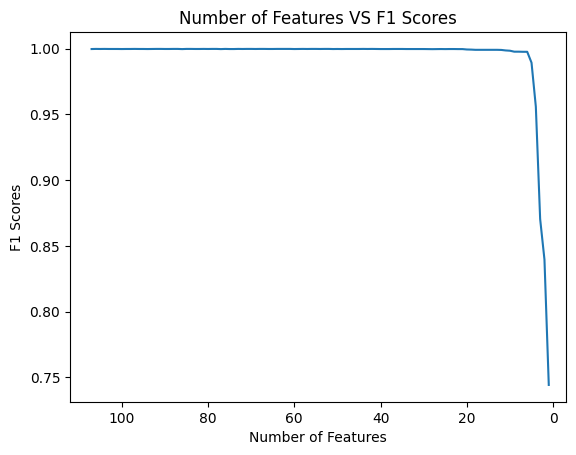

In [24]:
num_features = range(num_feature_start, 0, -1)

plt.plot(num_features, f1_scores)
plt.xlabel("Number of Features")
plt.ylabel("F1 Scores")
plt.title("Number of Features VS F1 Scores")
plt.xlim(num_feature_start + 5, 1-4)
plt.show()

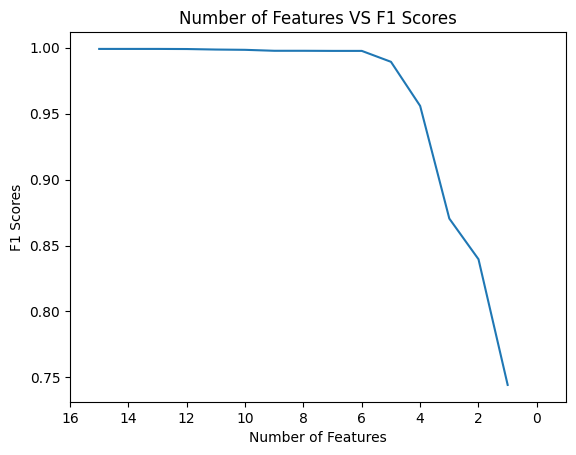

In [31]:
num_features = range(num_feature_start, 0, -1)

plt.plot(num_features[-15:], f1_scores[-15:])
plt.xlabel("Number of Features")
plt.ylabel("F1 Scores")
plt.title("Number of Features VS F1 Scores")
plt.xlim( 15 + 1, -1)
plt.show()